In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

import cv2
from tensorflow.keras.layers import Dense, Activation, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
%matplotlib inline

In [2]:
import os
labels = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']
train_data_dir= r"./Documents/archive/train"
val_data_dir= r"./Documents/archive/eval"
train_image=[]
train_label=[]
val_image=[]
val_label=[]

def load_train_dataset():
    for train_dir  in os.listdir(train_data_dir):
        if train_dir.split()[0] in labels:
            for image in os.listdir(train_data_dir+"/"+train_dir):
                train_label.append(train_dir.split()[0])
                train_image.append(train_data_dir+"/"+train_dir+"/"+image)
    return train_image, train_label

def load_val_dataset():
    for val_dir  in os.listdir(val_data_dir):
        if val_dir.split()[0] in labels:
            for image in os.listdir(val_data_dir+"/"+val_dir):
                val_label.append(val_dir.split()[0])
                val_image.append(val_data_dir+"/"+val_dir+"/"+image)
    return val_image, val_label

In [3]:
train_image, train_label = load_train_dataset()
val_image, val_label = load_val_dataset()
print(len(train_image))
print(len(val_image))
print(len(train_label))
print(len(val_label))

7557
1010
7557
1010


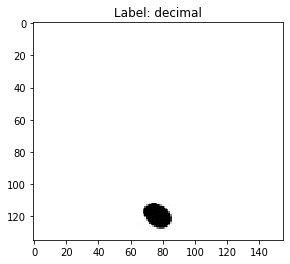

In [4]:
image = cv2.imread(train_image[140])
plt.imshow(image)
plt.title("Label: " + train_label[140])
plt.show()

In [5]:
img_height = 100
img_width = 100
train = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode = "int",
    color_mode = "rgb",
    batch_size = 100000,
    image_size=(img_height, img_width),
    shuffle=True,
)

val = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    label_mode = "int",
    color_mode="rgb",
    batch_size=100000,
    image_size=(img_height, img_width),
    shuffle=True,
)

Found 7691 files belonging to 20 classes.
Found 1021 files belonging to 18 classes.


In [6]:
import tensorflow_datasets as tfds

for images, labels in tfds.as_numpy(train):
    print(images.shape)
    print(labels.shape)

for val_images, val_labels in tfds.as_numpy(val):
    print(val_images.shape)
    print(val_labels.shape)

(7691, 100, 100, 3)
(7691,)
(1021, 100, 100, 3)
(1021,)


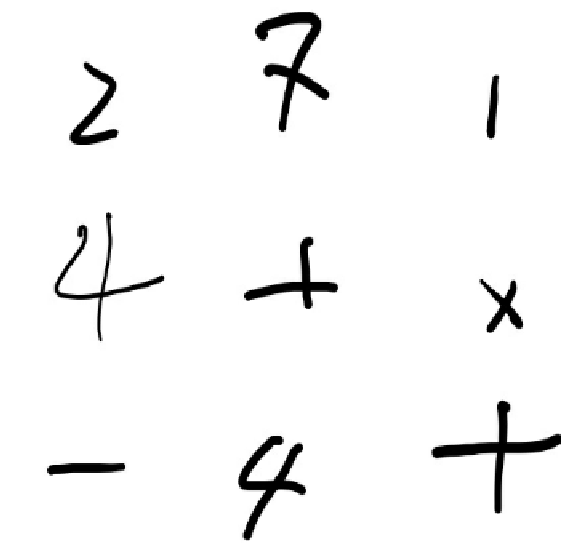

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
images = np.array(images)
val_images = np.array(val_images)

In [9]:
images = images.astype('float32')
val_images = val_images.astype('float32')
images /= 255
val_images /= 255

In [10]:
epochs = 10
learning_rate= 0.01
batch_size=50
n_input = 28

In [11]:
print(images.shape)
print(labels.shape)
classes=20

(7691, 100, 100, 3)
(7691,)


In [12]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3),padding="same", activation='relu', input_shape=(100,100,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax'))
    return model

In [13]:
model = create_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        3

In [15]:
print(images.shape)
print(labels.shape)

(7691, 100, 100, 3)
(7691,)


In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam', metrics=['accuracy'])
history=model.fit(x=images, y=labels, epochs=10)

Epoch 1/10
241/241 [==============================] - 187s 749ms/step - loss: 1.6707 - accuracy: 0.5107
Epoch 2/10
241/241 [==============================] - 179s 743ms/step - loss: 0.5291 - accuracy: 0.8479
Epoch 3/10
241/241 [==============================] - 179s 741ms/step - loss: 0.3039 - accuracy: 0.9083
Epoch 4/10
241/241 [==============================] - 178s 738ms/step - loss: 0.1955 - accuracy: 0.9403
Epoch 5/10
241/241 [==============================] - 178s 738ms/step - loss: 0.1255 - accuracy: 0.9587
Epoch 6/10
241/241 [==============================] - 178s 737ms/step - loss: 0.0768 - accuracy: 0.9753
Epoch 7/10
241/241 [==============================] - 178s 737ms/step - loss: 0.0498 - accuracy: 0.9843
Epoch 8/10
241/241 [==============================] - 176s 729ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 9/10
241/241 [==============================] - 174s 724ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 10/10
241/241 [==============================] - 175s 727m

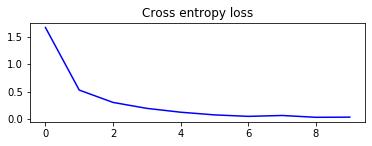

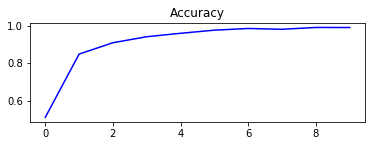

In [17]:
plt.subplot(211)
plt.title("Cross entropy loss")
plt.plot(history.history['loss'], color='blue',label='train')
plt.show()
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.show()

In [34]:
model.save("queritel.h5")

In [51]:
import cv2

img = cv2.imread('./Documents/five.png')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[-1,100,100,3])

classes = model.predict(img)

print(np.argmax(classes))

2


In [48]:
import cv2

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150) #sick
    return canny

sourceimage = cv2.imread(train_image[2])
img = np.copy(sourceimage)
canny = canny(img)
cv2.imshow("result", canny)
cv2.waitKey(0)


-1

In [22]:
model.evaluate(val_images, val_labels)

32/32 [==============================] - 5s 147ms/step - loss: 14.6317 - accuracy: 0.4946


[14.631708145141602, 0.4946131110191345]

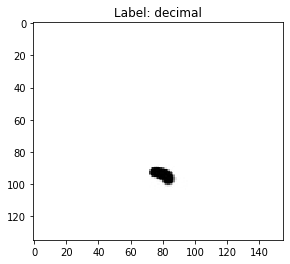

In [52]:
image = cv2.imread(train_image[2])
plt.imshow(image)
plt.title("Label: " + train_label[2])
plt.show()